# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att3'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

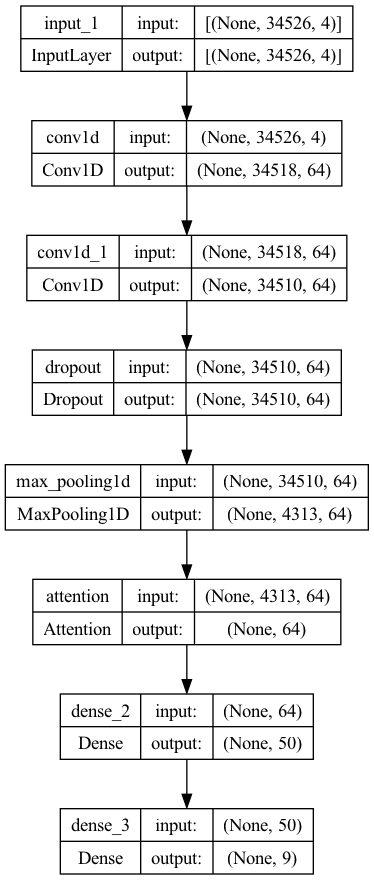

In [4]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34526, 4)]        0         
                                                                 
 conv1d (Conv1D)             (None, 34518, 64)         2304      
                                                                 
 conv1d_1 (Conv1D)           (None, 34510, 64)         36864     
                                                                 
 dropout (Dropout)           (None, 34510, 64)         0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 4313, 64)          0         
 D)                                                              
                                                                 
 attention (Attention)       (None, 64)                7920      
                                                             

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=3)])

Epoch 1/100
311/311 [==============================] - 2793s 9s/step - loss: 2.5566 - ERM: 0.0180 - KDEL: -0.2959 - LMA: -0.0284 - MITO: 0.0833 - NES: 0.0922 - NIK: 0.0370 - NLS: -0.0282 - NUCP: 0.1345 - OMM: -0.0683 - val_loss: 2.2148 - val_ERM: 0.1597 - val_KDEL: -0.1911 - val_LMA: 0.2538 - val_MITO: 0.0714 - val_NES: -0.2175 - val_NIK: -0.1567 - val_NLS: -0.0310 - val_NUCP: 0.1375 - val_OMM: -0.0683
Epoch 2/100
311/311 [==============================] - 3024s 10s/step - loss: 2.2384 - ERM: -0.0366 - KDEL: -0.2030 - LMA: -0.0262 - MITO: 0.1070 - NES: 0.0891 - NIK: 0.0342 - NLS: -0.0626 - NUCP: 0.1420 - OMM: -0.0301 - val_loss: 2.1979 - val_ERM: 0.0682 - val_KDEL: -0.0644 - val_LMA: 0.3443 - val_MITO: 0.0578 - val_NES: -0.2435 - val_NIK: -0.1538 - val_NLS: 0.0669 - val_NUCP: 0.0307 - val_OMM: -0.1258
Epoch 3/100
311/311 [==============================] - 2972s 9s/step - loss: 2.2119 - ERM: -0.0715 - KDEL: -0.1427 - LMA: 0.0144 - MITO: 0.1248 - NES: 0.0715 - NIK: 0.0384 - NLS: -0.0630 

2023-07-11 16:46:29.990647: W tensorflow/core/framework/op_kernel.cc:1816] UNKNOWN: AttributeError: 'GeneDataLoader' object has no attribute 'rand'
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/src/utils/data_utils.py", line 648, in get_index
    return _SHARED_SEQUENCES[uid][i]
           ~~~~~~~~~~~~~~~~~~~~~~^^^
  File "/Users/jonasflor/Desktop/TUM/rna-localization/dataloaders/GeneDataLoader.py", line 53, in __getitem__
    if self.rand:
       ^^^^^^^^^
AttributeError: 'GeneDataLoader' object has no attribute 'rand'
"""


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/Users/jonasflor/mambaforge/

UnknownError: Graph execution error:

AttributeError: 'GeneDataLoader' object has no attribute 'rand'
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/src/utils/data_utils.py", line 648, in get_index
    return _SHARED_SEQUENCES[uid][i]
           ~~~~~~~~~~~~~~~~~~~~~~^^^
  File "/Users/jonasflor/Desktop/TUM/rna-localization/dataloaders/GeneDataLoader.py", line 53, in __getitem__
    if self.rand:
       ^^^^^^^^^
AttributeError: 'GeneDataLoader' object has no attribute 'rand'
"""


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/src/engine/data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/src/utils/data_utils.py", line 871, in get
    raise e

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/src/utils/data_utils.py", line 862, in get
    inputs = self.queue.get(block=True, timeout=5).get()
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/multiprocessing/pool.py", line 774, in get
    raise self._value

AttributeError: 'GeneDataLoader' object has no attribute 'rand'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1849]

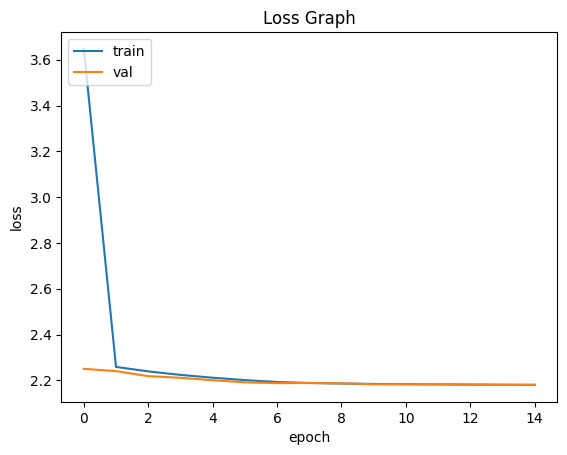

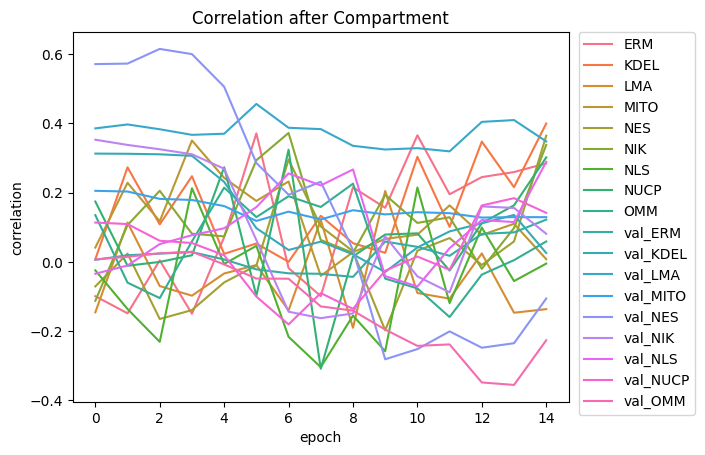

In [ ]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

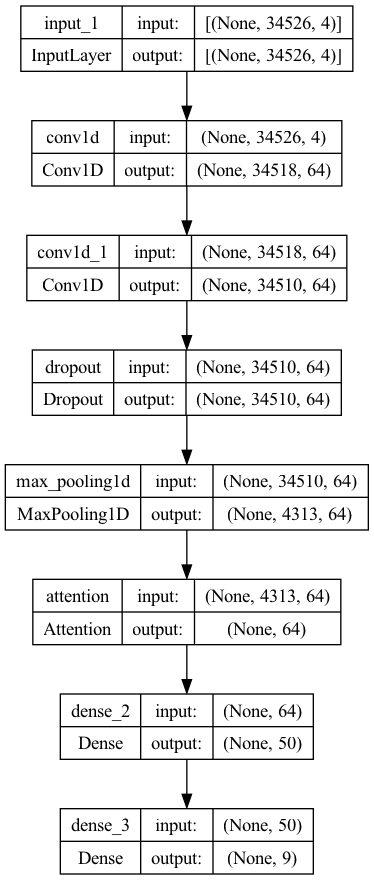

In [ ]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)